In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from thesis_toolbox.utils import get_locations_CLP, source_contrib_composite_difference, read_depostion_datasets
from thesis_toolbox.composites.create_composites import detrend_timeseries,select_years_to_composite
from thesis_toolbox.plot.plot_source_contribution import composite_depositon_facet_plot, depositon_facet_plot
from thesis_toolbox.plot.tools import add_letter
import matplotlib as mpl
import numpy as np
import matplotlib
import matplotlib.cm as cm


In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    psize = snakemake.wildcards.psize
else:
    path = '../../../'
    to_file= False
    psize = '20micron'

In [3]:
# locs = get_locations_CLP()
locs =['SHAPOTOU','SACOL','BAODE','LUOCHUAN','LINGTAI','LANTIAN']

wetdep20m = source_contrib_composite_difference(path, locs, 'wetdep', psize)
drydep20m = source_contrib_composite_difference(path, locs, 'drydep',psize)
totaldep20m = source_contrib_composite_difference(path, locs, 'total_deposition',psize)


In [4]:
cmap = mpl.cm.get_cmap('bwr',11)

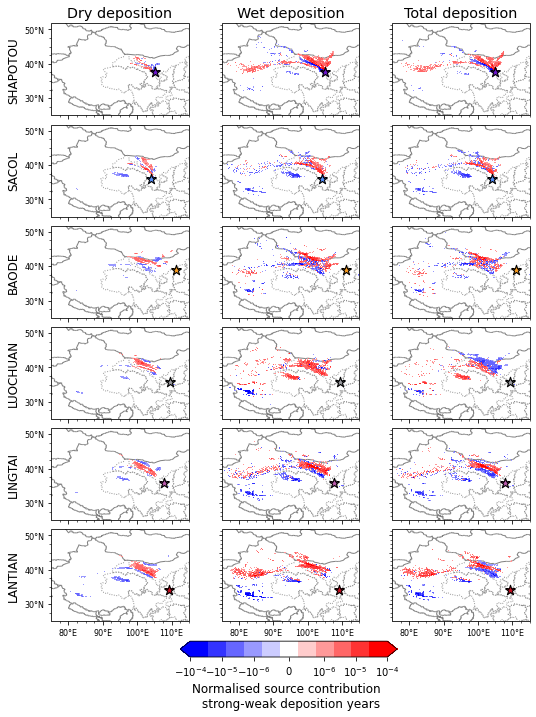

In [5]:
fig, ax = plt.subplots(nrows=6, ncols=3,  figsize=(8.3*1.1, 11), subplot_kw={'projection':ccrs.PlateCarree()})

norm=matplotlib.colors.SymLogNorm(linthresh=1e-6, linscale=1,vmin=-1e-4, vmax=1e-4,base=10)

cax = fig.add_axes([0.345, 0.08,0.33,0.02])
fig.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),cax=cax, label='Normalised source contribution \n strong-weak deposition years'
                            ,extend='both', orientation='horizontal')

composite_depositon_facet_plot(drydep20m,ax=ax[:,0],lin_tresh=1e-6,vmin=-1e-4,vmax=1e-4,upper_bound=1e-6, 
                               lower_bound=-1e-6, add_labels=False, colorbar=False,
                                hspace=0.1, wspace=0.05, add_site_name=False, no_tick_labels=True, cmap=cmap)

composite_depositon_facet_plot(wetdep20m,ax=ax[:,1],lin_tresh=1e-6,vmin=-1e-4,vmax=1e-4,upper_bound=1e-6, 
                               lower_bound=-1e-6, add_labels=False, colorbar=False,
                                hspace=0.1, wspace=0.05, add_site_name=False, no_tick_labels=True,cmap=cmap)
composite_depositon_facet_plot(totaldep20m,ax=ax[:,2],lin_tresh=1e-6,vmin=-1e-4,vmax=1e-4,upper_bound=1e-6, 
                               lower_bound=-1e-6, add_labels=False, colorbar=False,
                                hspace=0.1, wspace=0.05, add_site_name=False, no_tick_labels=True,cmap=cmap)

for axi in ax.ravel():
    axi.set_extent([75,115,25,50])
    axi.set_xticks([80, 90, 100, 110])
for axi,l in zip(ax[:,0].ravel(),locs):
    axi.set_ylabel(l)
    axi.set_yticks([30, 40, 50])
    axi.yaxis.set_ticklabels(['30°N', '40°N', '50°N'], fontsize=8)

for axi in ax[-1,:].ravel():
    axi.set_xticks([80, 90, 100, 110])
    axi.xaxis.set_ticklabels(['80°E', '90°E', '100°E', '110°E'], fontsize=8)



fig.subplots_adjust(hspace=0.1, wspace=0.01)

# add_letter(ax.T,y=1.07, fontsize=10)
ax[0,0].set_title('Dry deposition')
ax[0,1].set_title('Wet deposition')
ax[0,2].set_title('Total deposition')

if to_file:
    plt.savefig(snakemake.output.source_contrib_diff_path, bbox_inches='tight')